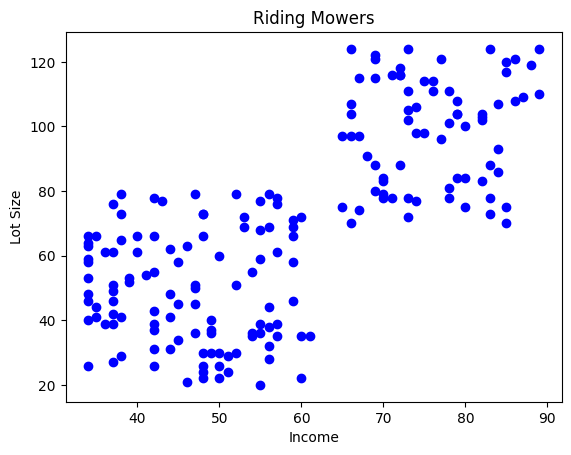

In [14]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest

df = pd.read_csv("/home/darkstar/Documents/pg-dbda/module7_statistics/Daywise Study Material/datasets/RidingMowers.csv")

dum_df = pd.get_dummies(df)
dum_df = dum_df.drop('Response_Not Bought', axis=1)

X = dum_df.iloc[:,0:2]
y = dum_df.iloc[:,2]

#### Visualizing the Data
import matplotlib.pyplot as plt
#X_B = X[y==1]
#X_NB = X[y==0]
plt.scatter(X.Income,X.Lot_Size,c="blue")

plt.title("Riding Mowers")
plt.xlabel('Income')
plt.ylabel('Lot Size')
plt.show()



/home/darkstar/lang/python/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


%age of outliers=5.0%


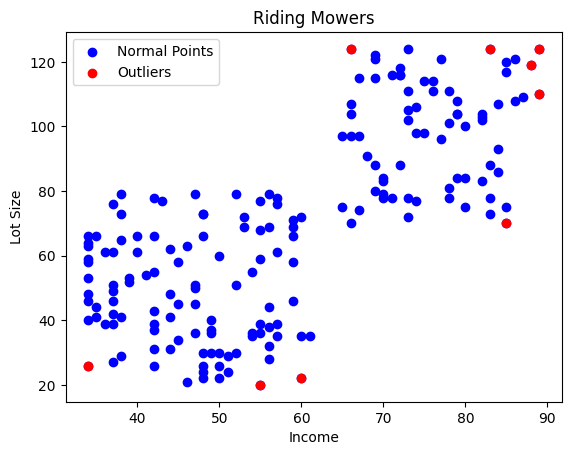

In [12]:
clf = IsolationForest(contamination=0.05, random_state=23)
clf.fit(X)
predictions = clf.predict(X)

print("%age of outliers="+ str((predictions<0).mean()*100)+ "%")
abn_ind = np.where(predictions < 0)

plt.scatter(X.Income,X.Lot_Size,c="blue",label="Normal Points")
plt.scatter(X['Income'].loc[abn_ind],
            X['Lot_Size'].loc[abn_ind],c="red",label="Outliers")

plt.legend()
plt.title("Riding Mowers")
plt.xlabel('Income')
plt.ylabel('Lot Size')
plt.show()



In [13]:
# series_outliers = pd.Series(predictions,name="Outliers")
# dt_outliers = pd.concat([df,series_outliers],axis=1)
# only_outliers = dt_outliers[dt_outliers['Outliers']==-1]
# wo_outliers = dt_outliers[dt_outliers['Outliers']!=-1]

inliers = df[predictions!=-1]
outliers = df[predictions==-1]
print(inliers)
print(outliers)

     Income  Lot_Size    Response
1        34        40  Not Bought
2        34        46  Not Bought
3        34        48  Not Bought
4        34        53  Not Bought
5        34        58  Not Bought
..      ...       ...         ...
172      85       117      Bought
173      85       120      Bought
174      86       108      Bought
175      86       121      Bought
176      87       109      Bought

[171 rows x 3 columns]
     Income  Lot_Size    Response
0        34        26  Not Bought
81       55        20  Not Bought
103      60        22  Not Bought
113      66       124      Bought
166      83       124      Bought
170      85        70      Bought
177      88       119      Bought
178      89       110      Bought
179      89       124      Bought
